In [17]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

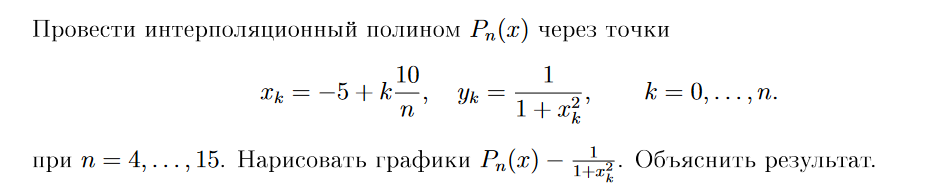

In [18]:
def Xk(k : int, n : int):
    return -5 + k * 10 / n

def Yk(Xk : float):
    return 1/(1+Xk**2)

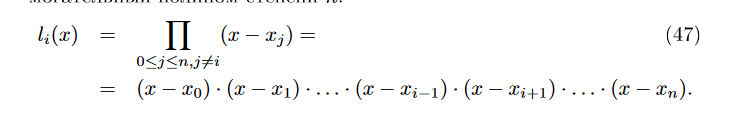

In [19]:
def l_i(X : np.ndarray, x : float,  i : int):
    X_masked = np.ma.array(x-X, mask=False)
    X_masked.mask[i]=True
    return np.prod(X_masked)

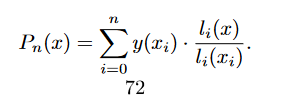


In [20]:
def Pn_Lagrange(X : np.ndarray, x : float, n : int):
    I = np.arange(0,n+1)
    res : float = 0.0
    for i in I:
        res += Yk(X[i])*l_i(X, x, i)/l_i(X, X[i], i)
#     res = np.sum(Yk(X[I])*l_i(X, x, I)/l_i(X, X[I], I))
    return res


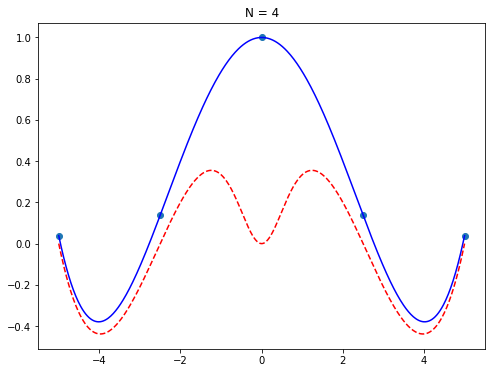

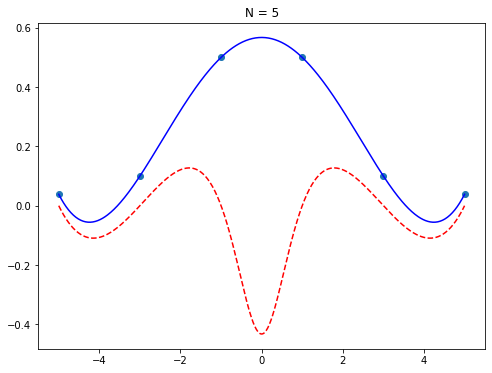

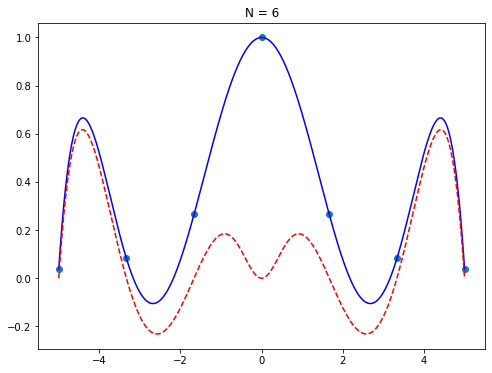

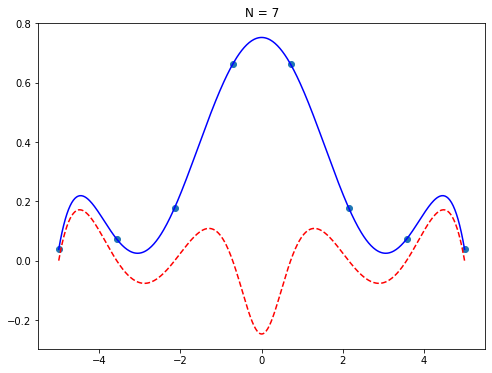

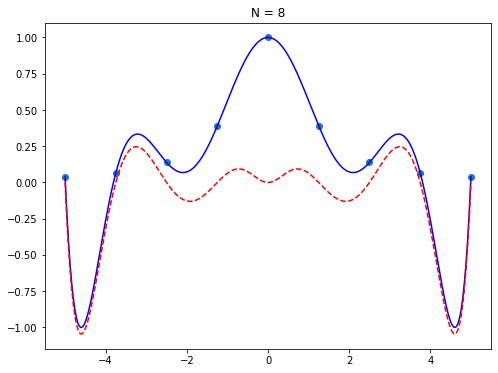

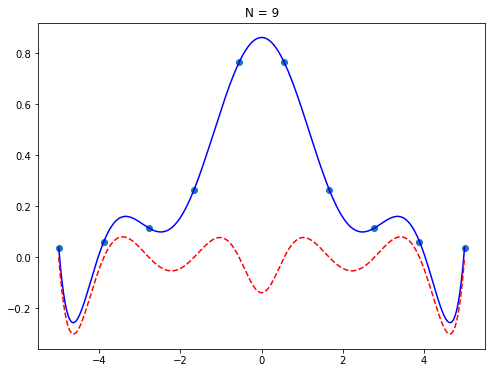

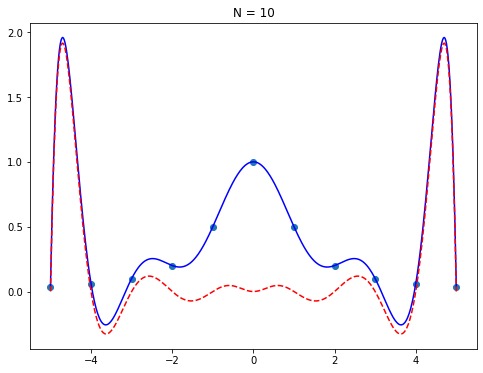

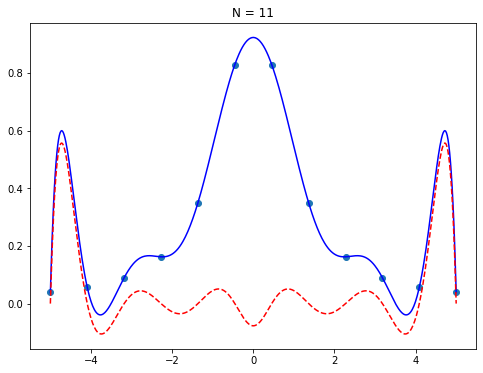

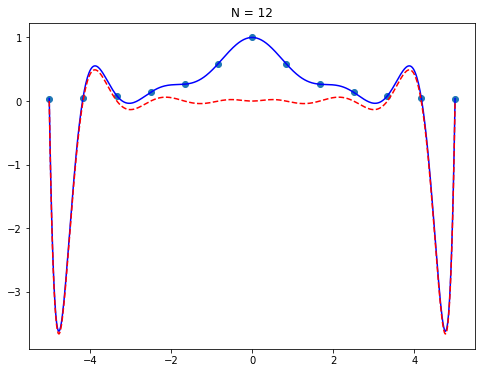

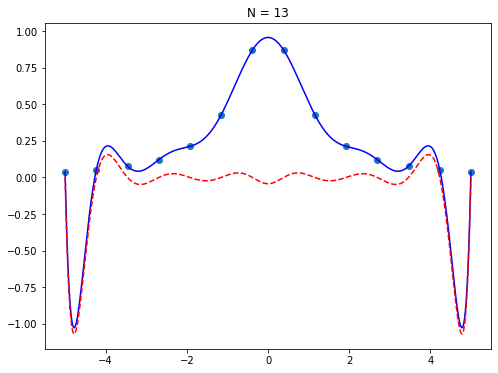

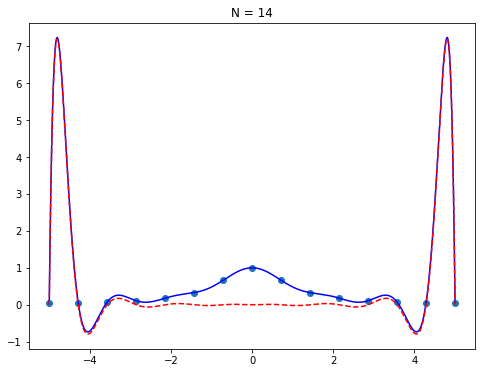

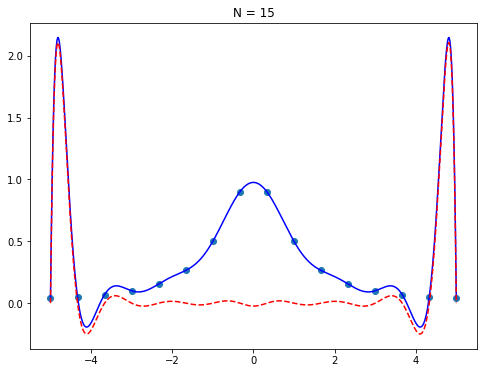

In [21]:
N = np.arange(4,16)
for n in N:
    K = np.arange(n+1)
    X = Xk(K, n)
    Y = Yk(X)
    x_grid = np.linspace(X[0], X[-1], 500)
    A = 1/(x_grid**2+1)
    y_grid = np.empty(len(x_grid))    
    for i in range(len(x_grid)):
        y_grid[i] = Pn_Lagrange(X, x_grid[i], n)
    plt.title(f"N = {n}")
    plt.plot(X,Y, 'o')
    plt.plot(x_grid, y_grid, color='blue')
    plt.plot(x_grid, y_grid-A, '--', color='red')
    plt.show()